In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Mortgage_Default/Data_and_Cleaning/revised_mort_data.csv')

In [4]:
cols_drop = ['Unnamed: 0', 'id', 'default_time', 'payoff_time', 'ratio_paid']

In [5]:
df.drop(columns=cols_drop, inplace=True)

In [6]:
df

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,1
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,1
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,1
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,0
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,1
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,0
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,1


In [7]:
df.isna().sum()

balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
status_time                0
dtype: int64

In [8]:
# Split the outcome and predictor variables
y = df['status_time']
X = df.drop("status_time", axis=1)

In [9]:
df.dtypes

balance_time               float64
LTV_time                   float64
interest_rate_time         float64
hpi_time                   float64
gdp_time                   float64
uer_time                   float64
REtype_CO_orig_time          int64
REtype_PU_orig_time          int64
REtype_SF_orig_time          int64
investor_orig_time           int64
balance_orig_time          float64
FICO_orig_time               int64
LTV_orig_time              float64
Interest_Rate_orig_time    float64
hpi_orig_time              float64
status_time                  int64
dtype: object

In [10]:
X.dtypes

balance_time               float64
LTV_time                   float64
interest_rate_time         float64
hpi_time                   float64
gdp_time                   float64
uer_time                   float64
REtype_CO_orig_time          int64
REtype_PU_orig_time          int64
REtype_SF_orig_time          int64
investor_orig_time           int64
balance_orig_time          float64
FICO_orig_time               int64
LTV_orig_time              float64
Interest_Rate_orig_time    float64
hpi_orig_time              float64
dtype: object

In [11]:
# Create dummy variables
data = pd.get_dummies(X)
data.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42


In [12]:
data

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77


In [45]:
data_train, data_test, target_train, target_test = train_test_split(data, y, 
                                                                    test_size = 0.25, random_state=123)

In [14]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
# Feature importance
tree_clf.feature_importances_

array([5.59186612e-04, 3.66218323e-02, 1.04421140e-01, 1.17486816e-02,
       4.39681877e-02, 4.09270180e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.25544793e-02, 6.89859745e-02,
       1.57206117e-02, 0.00000000e+00, 6.44492889e-01])

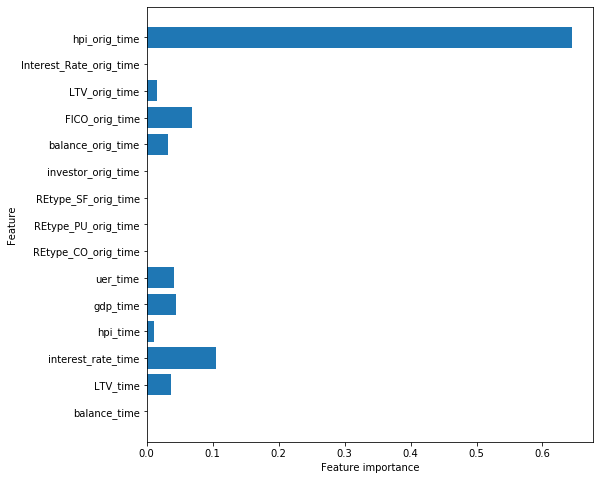

In [16]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [17]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[2212 1449]
 [1101 4753]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      3661
           1       0.77      0.81      0.79      5854

    accuracy                           0.73      9515
   macro avg       0.72      0.71      0.71      9515
weighted avg       0.73      0.73      0.73      9515



In [18]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.2%


In [19]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [20]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [21]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7393056090810356

In [22]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.7375722543352601

In [23]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
# Training accuracy score
forest.score(data_train, target_train)

0.7408471429071927

In [25]:
# Test accuracy score
forest.score(data_test, target_test)

0.7375722543352601

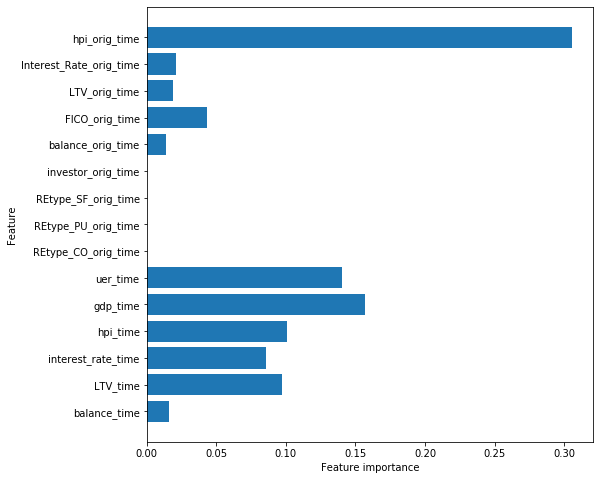

In [26]:
plot_feature_importances(forest)

In [27]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

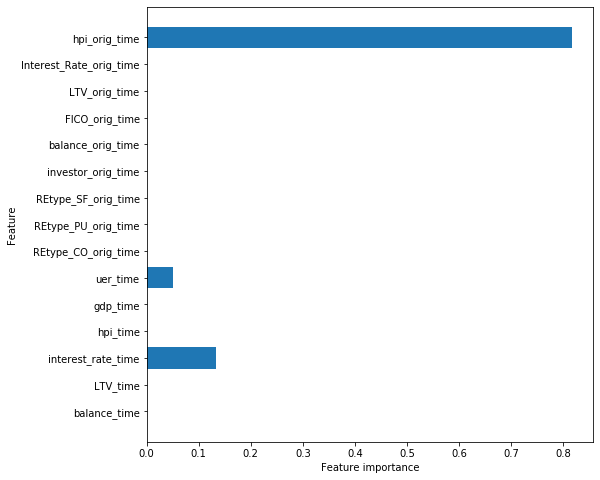

In [29]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [30]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

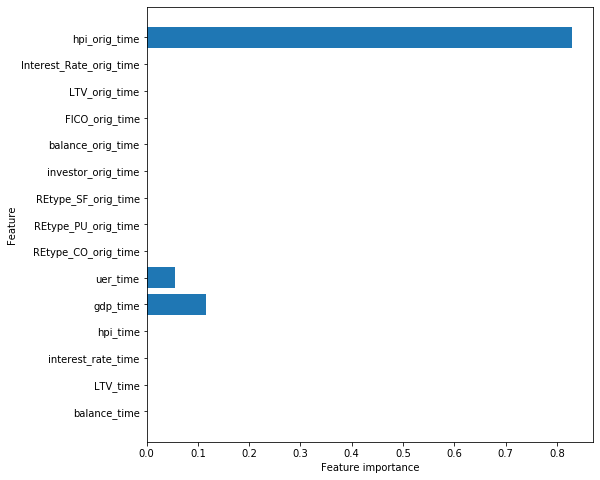

In [31]:
# Feature importance
plot_feature_importances(rf_tree_2)

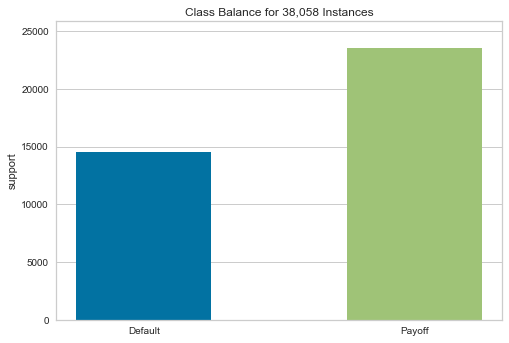

In [32]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
data_test, target_test = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=[ "Default", "Payoff"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [34]:
from sklearn.model_selection import cross_val_score 

In [43]:
clf = RandomForestClassifier()

In [47]:
rf_cv_score = cross_val_score(forest_2, data_test, target_test, cv=3)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score: 72.14%


[[2212 1101]
 [1449 4753]]


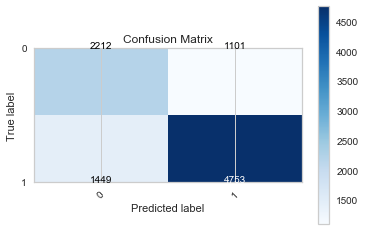

In [68]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix



cnf_matrix = confusion_matrix(pred, target_test)

print(cnf_matrix)

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [69]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.6676728  0.3323272 ]
 [0.23363431 0.76636569]]


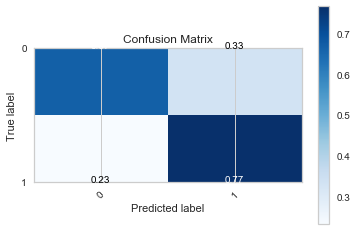

In [71]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
confusion matrix
cross validate
no gridsearch
check balance